In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#the data is download from Kaggle and is untitled Titanic - Machine Learning from Disaster
titanic_data = pd.read_csv('/content/drive/My Drive/train.csv')

# Display the first few rows of the dataset
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


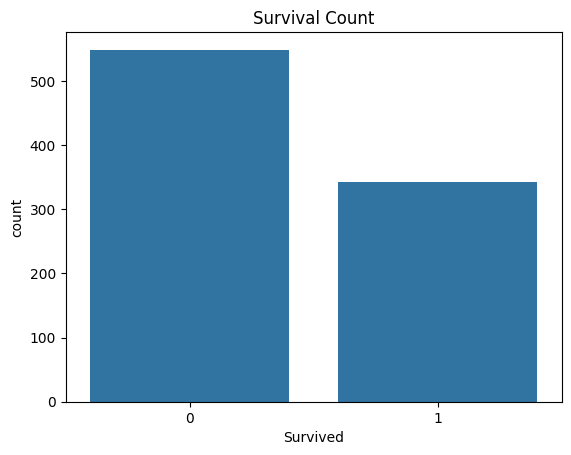

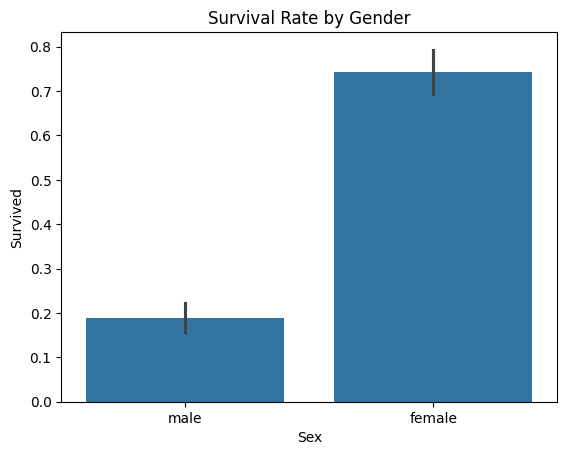

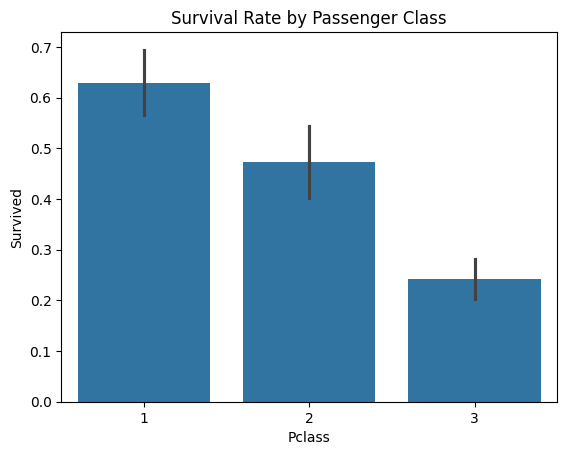

In [ ]:
# Plot the survival count
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

# Plot the survival rate by gender
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.show()

# Plot the survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.show()


In [ ]:
# Fill missing values in 'Age' with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most common port
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Create a new feature 'FamilySize'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Drop irrelevant columns
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)


In [ ]:


# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    titanic_data[column] = le.fit_transform(titanic_data[column])
    label_encoders[column] = le

# Define features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



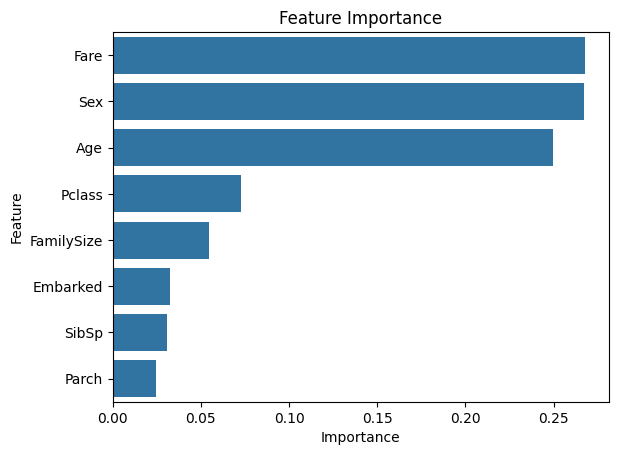

In [ ]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
